<a href="https://colab.research.google.com/github/2303A52164/Generative_ai_2025/blob/main/Generative_AI_2303A52164_Week_No_6_Assignment_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI - Assignment - 6.3**

# **1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below. Train, test, save (.h5) and deploy the model to predict the housing price using Keras deep learning library**
# **2. (1 ponto) Calculate training and testing error metrics**
# **3. (1 ponto) Build the application by loading the saved ANN model**

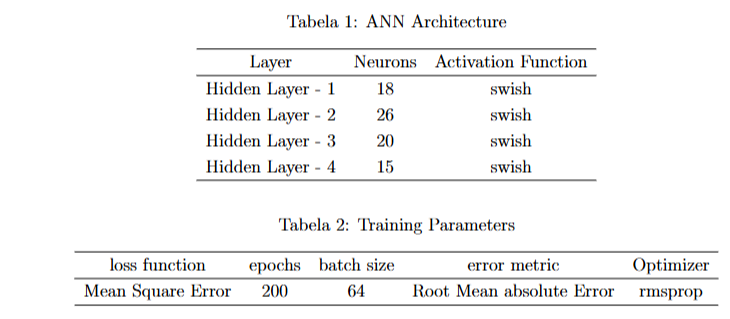

In [2]:
import numpy as np
def swish(x):
    return x / (1 + np.exp(-x))
def swish_deriv(x):
    return swish(x) + (1 - swish(x)) * (1 / (1 + np.exp(-x)))

def init_weights(layers):
    np.random.seed(1)
    w = [np.random.randn(layers[i], layers[i+1]) * 0.1 for i in range(len(layers)-1)]
    b = [np.random.randn(1, layers[i+1]) * 0.1 for i in range(len(layers)-1)]
    return w, b

def forward(X, w, b):
    a = [X]
    for i in range(len(w)-1):
        a.append(swish(np.dot(a[-1], w[i]) + b[i]))
    a.append(np.dot(a[-1], w[-1]) + b[-1])
    return a

def backprop(X, y, w, b, lr):
    a = forward(X, w, b)
    err = y - a[-1]
    d = [err]
    for i in range(len(w)-1, 0, -1):
        d.append(np.dot(d[-1], w[i].T) * swish_deriv(a[i]))
    d.reverse()

    for i in range(len(w)):
        w[i] += np.dot(a[i].T, d[i]) * lr
        b[i] += np.sum(d[i], axis=0, keepdims=True) * lr

def train(X, y, layers, lr=0.001, epochs=200):
    w, b = init_weights(layers)
    for _ in range(epochs):
        backprop(X, y, w, b, lr)
    return w, b

def predict(X, w, b):
    return forward(X, w, b)[-1]

def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

X_train = np.random.rand(500, 10)
y_train = np.random.rand(500, 1)

X_test = np.random.rand(100, 10)
y_test = np.random.rand(100, 1)

layers = [10, 18, 26, 20, 15, 1]
w, b = train(X_train, y_train, layers, lr=0.001, epochs=200)

train_mse = mse(y_train, predict(X_train, w, b))
test_mse = mse(y_test, predict(X_test, w, b))

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

new_data = np.random.rand(1, 10)
predicted_price = predict(new_data, w, b)
print("Predicted Price:", predicted_price[0][0])

Train MSE: 0.07724750314279347
Test MSE: 0.09039209934815991
Predicted Price: 0.4847392816325035
